<a href="https://colab.research.google.com/github/SeptiLutfiana/MESIN-LEARNING/blob/main/Tugas_Pertemuan9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 4**
- Muhammad Ali Z
- Ilham Yudantyo
- M. Ilzamul Fikri
- Ulfi Mustatiq Abidatul Izza
- Septi Lutfiana

**TUGAS**

1. Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
2. Anda diperbolehkan melakukan eksplorasi terhadap,


*   Metode Pra Pengolahan
*   Pemilihan Fitur
*   Arsitektur ANN
* Fungsi Aktiviasi

3. ANN diimplementasikan dengan menggunakan tensorflow.

**JELASKAN HASIL YANG ANDA DAPATKAN,**

**AKURASI**

**CONFUSION MATRIX**

**KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN**


**Versi 0 - Metode Pra Pengolahan Normalisasi data - ANN**

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [33]:
# Memuat data MNIST
(X_train, train_labels), (y_test, test_labels) = mnist.load_data()

**normalisasi data**

In [34]:
# Normalisasi data
X_train = X_train / 255.0
y_test = y_test/ 255.0

**Split Data**

In [35]:
# Membangun model ANN
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Mengubah citra 28x28 menjadi vektor 1D
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Layer output dengan 10 neuron untuk klasifikasi 0-9
])

In [36]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Melatih model
model.fit(X_train, train_labels, epochs=10, batch_size=32, validation_data=(y_test, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2407 - accuracy: 0.9279 - val_loss: 0.1332 - val_accuracy: 0.9604
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1044 - accuracy: 0.9684 - val_loss: 0.0872 - val_accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0720 - accuracy: 0.9767 - val_loss: 0.0709 - val_accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.0819 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0438 - accuracy: 0.9857 - val_loss: 0.0720 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0345 - accuracy: 0.9884 - val_loss: 0.0761 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 0.0758 - val_accuracy:

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9768


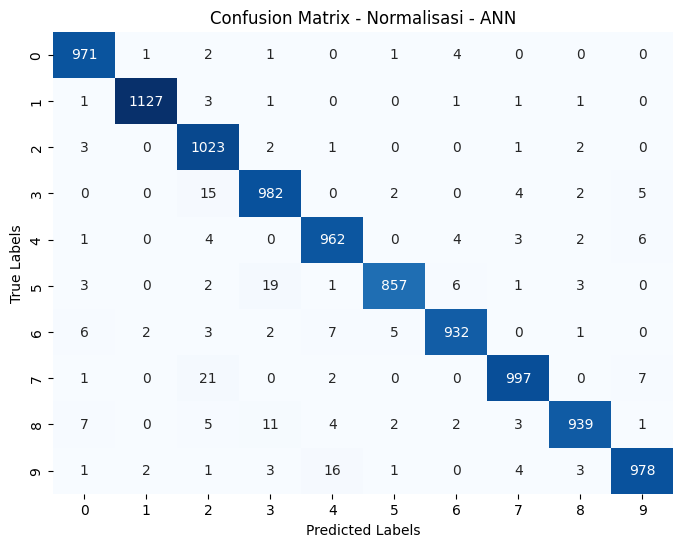

In [38]:
# Akurasi
# Convision Matrik
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Predict test set labels
predictions = model.predict(y_test)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Normalisasi - ANN')
plt.show()

Memuat dataset MNIST dan melakukan normalisasi data.
Membangun model Sequential ANN dengan tiga layer: input layer (Flatten), dua hidden layer (Dense), dan output layer.
Melatih model menggunakan data pelatihan (X_train dan y_train) dengan 10 epoch dan batch size sebesar 32.
Mengevaluasi model pada data uji (X_test dan test_labels).

**VERSI 1 - Menggunakan pra prosesing dengn Augmentasi dan normalisasi data**

In [39]:
#versi 2
# Metode Pra Pengolahan
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [40]:
# Memuat data MNIST
(X_train, train_labels), (y_test, test_labels) = mnist.load_data()

*normalisasi data yang dilakukan untuk memastikan dalam rentang yang konsisten. teknik augmentasi data dapat digunakan untuk menambah variasi data pelatihan, mencegah overfitting dan memperkenalkan variasi pada data*

In [41]:
# Definisi model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [42]:
# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [43]:
# Normalisasi data
X_train = X_train / 255.0
y_test = y_test/ 255.0

In [44]:
# Augmentasi data
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [45]:
# Augmentasi data
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,  # Tidak melakukan flip horizontal
    vertical_flip=False  # Tidak melakukan flip vertikal
)

In [46]:
# Menyesuaikan generator dengan data pelatihan
datagen.fit(X_train.reshape(-1, 28, 28, 1))

In [47]:
# Pelatihan model dengan augmented data
model.fit(datagen.flow(X_train.reshape(-1, 28, 28, 1), train_labels, batch_size=32), epochs=10, validation_data=(y_test, test_labels))

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4830 - accuracy: 0.8526 - val_loss: 0.1612 - val_accuracy: 0.9484
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2277 - accuracy: 0.9311 - val_loss: 0.1317 - val_accuracy: 0.9565
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1846 - accuracy: 0.9436 - val_loss: 0.0949 - val_accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1629 - accuracy: 0.9505 - val_loss: 0.0755 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1435 - accuracy: 0.9554 - val_loss: 0.0809 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1388 - accuracy: 0.9579 - val_loss: 0.0960 - val_accuracy: 0.9685
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1278 - accuracy: 0.9605 - val_loss: 0.0711 -

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.978


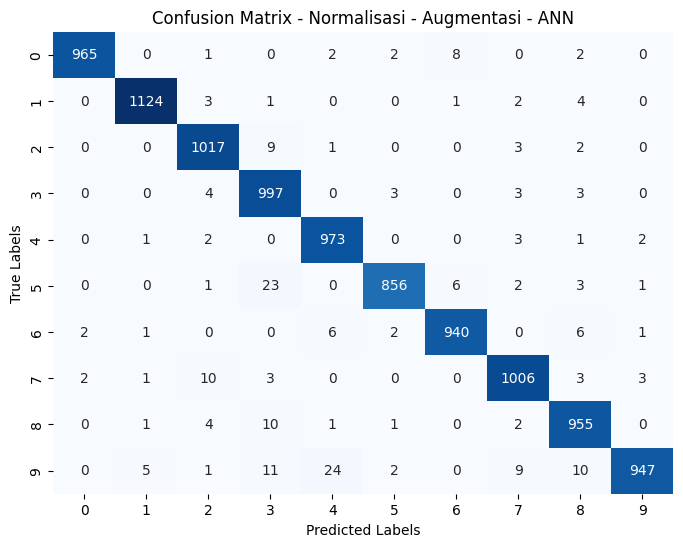

In [49]:
# Akurasi
# Convision Matrik
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Predict test set labels
predictions = model.predict(y_test)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Normalisasi - Augmentasi - ANN')
plt.show()

**VERSI 2 - Menggunakan Fitur CNN untuk data MNIST ANN**

**Pemilihan Fitur**

In [50]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [51]:
# Ekstraksi Fitur dengan Konvolusi
# normalisasi data terlebih dahulu
# Normalisasi data dan penyesuaian dimensi untuk CNN
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
y_test = y_test.reshape((y_test.shape[0], 28, 28, 1))
X_train = X_train.astype('float32') / 255
y_test = y_test.astype('float32') / 255

In [52]:
# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    ## LAYER ANN
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # klasifikasi 0-9
])

In [53]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
# Melatih model
model.fit(X_train, train_labels, epochs=10, batch_size=64, validation_data=(y_test, test_labels))

Epoch 1/10
938/938 [==============================] - 49s 51ms/step - loss: 0.9325 - accuracy: 0.6799 - val_loss: 0.3892 - val_accuracy: 0.8764
Epoch 2/10
938/938 [==============================] - 45s 48ms/step - loss: 0.3370 - accuracy: 0.8956 - val_loss: 0.2557 - val_accuracy: 0.9209
Epoch 3/10
938/938 [==============================] - 47s 51ms/step - loss: 0.2360 - accuracy: 0.9266 - val_loss: 0.1781 - val_accuracy: 0.9436
Epoch 4/10
938/938 [==============================] - 45s 48ms/step - loss: 0.1700 - accuracy: 0.9475 - val_loss: 0.1276 - val_accuracy: 0.9619
Epoch 5/10
938/938 [==============================] - 45s 47ms/step - loss: 0.1311 - accuracy: 0.9593 - val_loss: 0.0989 - val_accuracy: 0.9703
Epoch 6/10
938/938 [==============================] - 44s 47ms/step - loss: 0.1091 - accuracy: 0.9674 - val_loss: 0.0947 - val_accuracy: 0.9712
Epoch 7/10
938/938 [==============================] - 45s 47ms/step - loss: 0.0943 - accuracy: 0.9707 - val_loss: 0.0791 - val_accuracy:

313/313 [==============================] - 2s 8ms/step
Accuracy: 0.9786


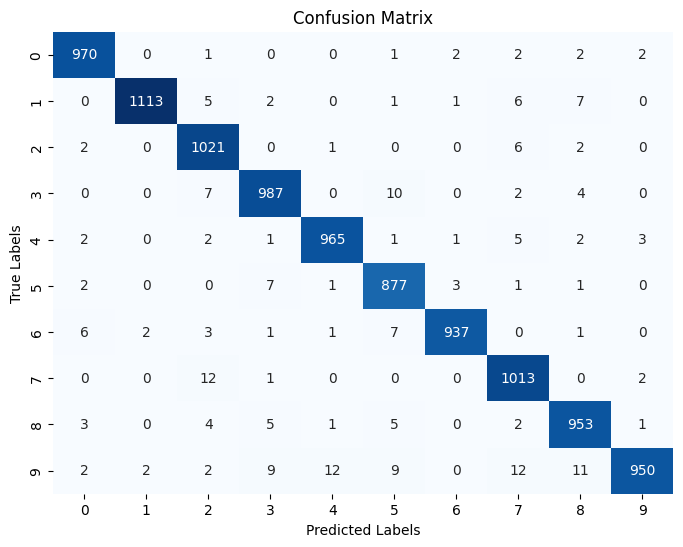

In [55]:
# Akurasi
# Convision Matrik
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Predict test set labels
predictions = model.predict(y_test)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**VERSI -3- Fitur PCA Untuk ANN**

In [56]:
import numpy as np
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Memuat data MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi data
train_images = train_images.reshape((train_images.shape[0], -1))  # Flatten citra menjadi vektor
test_images = test_images.reshape((test_images.shape[0], -1))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=100)  # Misalnya, menggunakan 100 komponen PCA
pca.fit(train_images)

train_images_pca = pca.transform(train_images)
test_images_pca = pca.transform(test_images)

# Membangun model ANN setelah PCA
model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),  # 100 komponen dari PCA sebagai masukan
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Layer output untuk klasifikasi 0-9
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
model.fit(train_images_pca, train_labels, epochs=10, batch_size=64, validation_data=(test_images_pca, test_labels))


Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3163 - accuracy: 0.9111 - val_loss: 0.1314 - val_accuracy: 0.9596
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1100 - accuracy: 0.9672 - val_loss: 0.0913 - val_accuracy: 0.9690
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0742 - accuracy: 0.9778 - val_loss: 0.0808 - val_accuracy: 0.9730
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.0741 - val_accuracy: 0.9753
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0712 - val_accuracy: 0.9781
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0747 - val_accuracy: 0.9789
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0735 - val_accuracy: 0.9787
Epoch 

313/313 [==============================] - 0s 1ms/step
Accuracy: 0.9773


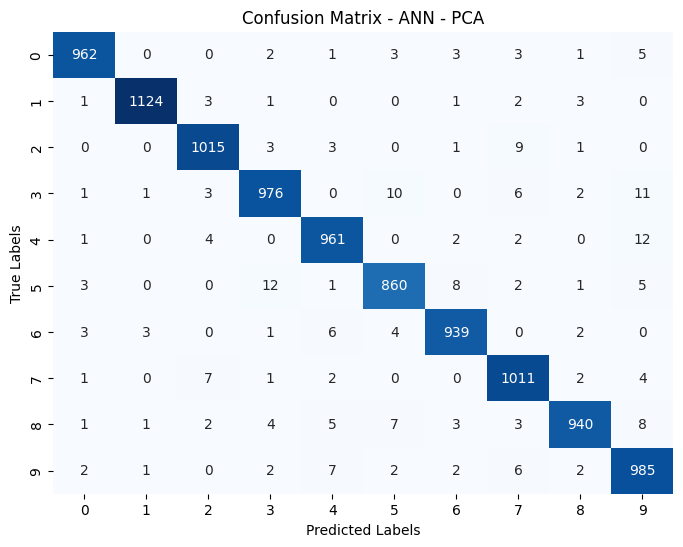

In [57]:
# Akurasi
# Convision Matrik
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Predict test set labels
predictions = model.predict(test_images_pca)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - ANN - PCA')
plt.show()

**Kesimpulan dari beberapa versi yang dijalankan**

**klasifikasi pada data MNIST dengan menggunakan model ANN, dengan metode pre
procesing normalisasi**

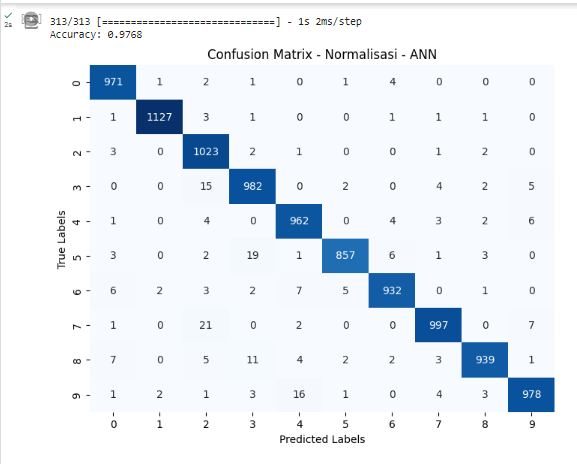

**klasifikasi pada data MNIST dengan menggunakan model ANN, dengan metode pre
procesing normalisasi dan augmentasi**

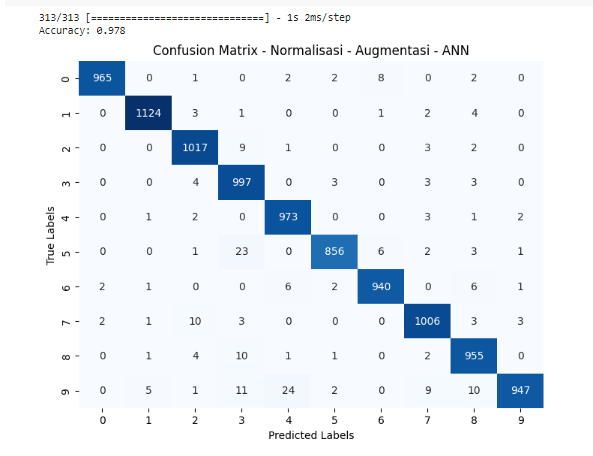

**klasifikasi pada data MNIST dengan menggunakan model ANN, dengan metode pre
procesing normalisasi dan menggunakan fitur CNN**

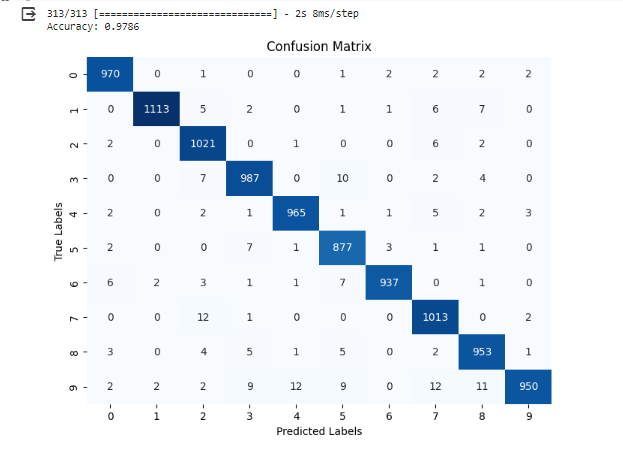

**klasifikasi pada data MNIST dengan menggunakan model ANN, dengan metode pre
procesing normalisasi dan menggunakan fitur PCA = 100**

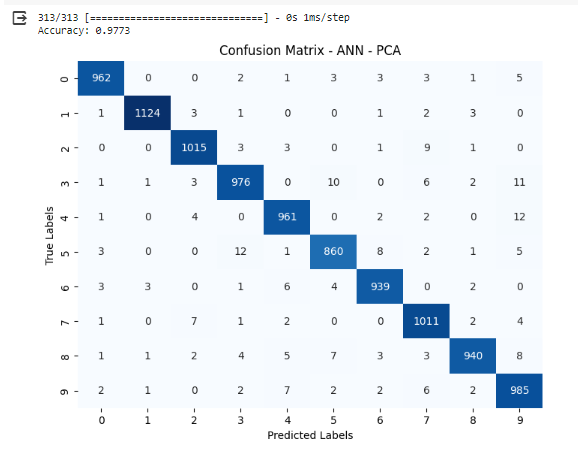

Tingkat akurasinya sama yaitu 0,97 atau 97%